In [1]:
%load_ext autoreload
import bpy
import numpy as np
import sys
import clipboard
import os
from collections import defaultdict
from PIL import Image
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [2]:
import cProfile
import IPython.display as dp
from pstats import Stats

# pip install gprof2dot

def profile(exec_code):
    cProfile.run(exec_code, filename='/tmp/cprof.pstats')
    !gprof2dot -f pstats /tmp/cprof.pstats | dot -Tpng -o /tmp/output.png
    return dp.Image(filename='/tmp/output.png')

In [3]:
import bpy
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

from Logic.bpy_connector import *

In [4]:
%autoreload 2
from Logic.bpy_connector import clean_scene, set_for_texture_generation, settings_for_texture_generation, NodesAdder, generate_image
from Logic.network_manager import NetworkManager, ParamRequestType

In [5]:
main_path = '/Users/orenm/BlenderShaderProject/data/'
images_path = os.path.join(main_path, 'images/')
node_trees_path = os.path.join(main_path, 'node_trees/')

In [54]:
nm = NetworkManager()
nm.initialize_network()
nm.generate_random_network(n_additions=5)
rand_params = nm.get_random_param_values(ParamRequestType.NON_VECTOR_INPUT)
nm.set_nodes_attributes(rand_params)

In [55]:
image_path = os.path.join(images_path, 'test.png')
generate_image(nm, image_path)

Info: Deleted 3 data-block(s)


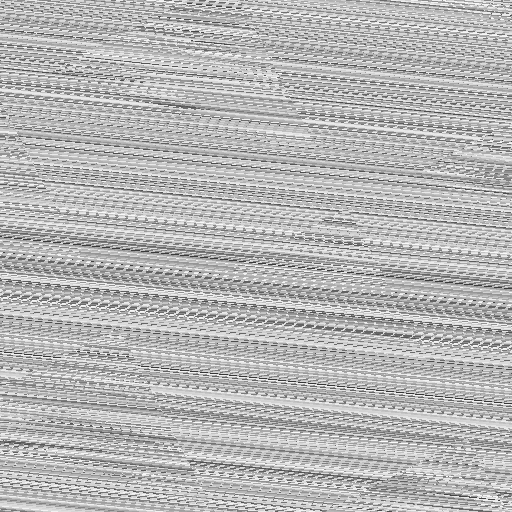

In [56]:
img = Image.open(image_path) 
img

In [57]:
img_array = np.array(img)

img_array.std()

39.90142419930491